Thank You Siraj for the lesson

In [0]:
%matplotlib inline

In [2]:
!pip install dgl

     |████████████████████████████████| 3.0MB 4.6MB/s 


In [0]:
import dgl
import numpy as np


def build_toy_graph():
  src = np.array([1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 9, 10, 10,
        10, 11, 12, 12, 13, 13, 13, 13, 16, 16, 17, 17, 19, 19, 21, 21,
        25, 25, 27, 27, 27, 28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 33, 33, 33, 33])
  dst = np.array([0, 0, 1, 0, 1, 2, 0, 0, 0, 4, 5, 0, 1, 2, 3, 0, 2, 2, 0, 4,
        5, 0, 0, 3, 0, 1, 2, 3, 5, 6, 0, 1, 0, 1, 0, 1, 23, 24, 2, 23,
        24, 2, 23, 26, 1, 8, 0, 24, 25, 28, 2, 8, 14, 15, 18, 20, 22, 23,
        29, 30, 31, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30,
        31, 32])
  # edge_list = [(1,0),(2,0),(2,1),(3,0),(3,1),(3,2),(4,0),(5,0),(6,0),(6,4),
  #              (6,5),(7,0),(7,1),(7,2),(7,3),(8,0),(8,2),(9,2),(10,0),(10,4),(10,5),
  #              (11,0),(12,0),(12,3),(13,0),(13,1),(13,2),(13,3),(16,5),(16,6),(17,0),
  #              (17,1),(19,0),(19,1),(21,0),(21,1),(25,23),(25,24),(27,2),(27,23),
  #              (27,24),(28,2),(29,29),(29,26),(30,1),(30,8),(31,0),(31,24),(31,25),(31,28),(32,2),(32,8),
  #              (32,14),(32,15),(32,18),(32,20),(32,22),(32,23),(32,29),(32,30),(32,31),(33,14),(33,15),(33,18),
  #              (33,19),(33,20),(33,22),(33,23),(33,26),(33,27),(33,28),(33,29),(33,30),(33,31),(33,32)]
  u = np.concatenate([src,dst])
  v = np.concatenate([dst,src])
  return dgl.DGLGraph((u,v))

In [23]:
G = build_toy_graph()
print("we have %d nodes" % G.number_of_nodes())
print("we have %d edges" % G.number_of_edges())

we have 34 nodes
we have 156 edges


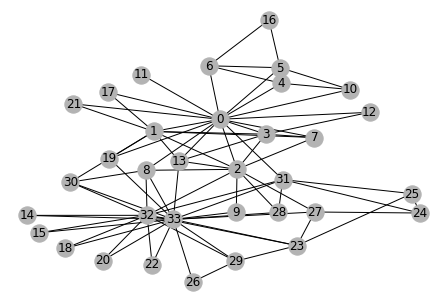

In [24]:
import networkx as nx
nx_G = G.to_networkx().to_undirected()
pos=nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7,.7,.7]])

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

embed = nn.Embedding(34,5)
G.ndata['feat'] = embed.weight

In [32]:
print(G.nodes[2].data['feat'])

print(G.nodes[10,11].data['feat'])

tensor([[ 0.8632,  0.3264, -0.9760, -1.2439,  1.9873]],
       grad_fn=<IndexSelectBackward>)
tensor([[ 0.9286, -0.0844,  1.0728, -1.1117, -0.6052],
        [ 1.7622, -1.7470, -0.0061,  0.5057,  1.3925]],
       grad_fn=<IndexSelectBackward>)


In [0]:
from dgl.nn.pytorch import GraphConv

In [0]:
class GCN(nn.Module):
  def __init__(self, in_feats, hidden_size, num_classes):
    super(GCN, self).__init__()
    self.gcn1 = GraphConv(in_feats, hidden_size)
    self.gcn2 = GraphConv(hidden_size, num_classes)

  def forward(self, g, inputs):
    h = self.gcn1(g,inputs)
    h = torch.relu(h)
    h = self.gcn2(g,h)
    return h

net = GCN(5,5,2)

In [0]:
inputs = embed.weight
labeled_nodes = torch.tensor([0,33])
labels = torch.tensor([0,1])

In [51]:
import itertools
optimizer = torch.optim.Adam(itertools.chain(net.parameters()), lr=0.01)
all_logits = []
for epoch in range(30):
  logits = net(G,inputs)
  all_logits.append(logits.detach())
  logp= F.log_softmax(logits,1)
  loss = F.nll_loss(logp[labeled_nodes], labels)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print('Epoch %d | Loss: %.4f' % (epoch,loss.item()))

Epoch 0 | Loss: 0.2565
Epoch 1 | Loss: 0.2439
Epoch 2 | Loss: 0.2316
Epoch 3 | Loss: 0.2197
Epoch 4 | Loss: 0.2083
Epoch 5 | Loss: 0.1974
Epoch 6 | Loss: 0.1869
Epoch 7 | Loss: 0.1767
Epoch 8 | Loss: 0.1669
Epoch 9 | Loss: 0.1574
Epoch 10 | Loss: 0.1484
Epoch 11 | Loss: 0.1396
Epoch 12 | Loss: 0.1316
Epoch 13 | Loss: 0.1238
Epoch 14 | Loss: 0.1163
Epoch 15 | Loss: 0.1092
Epoch 16 | Loss: 0.1023
Epoch 17 | Loss: 0.0959
Epoch 18 | Loss: 0.0898
Epoch 19 | Loss: 0.0840
Epoch 20 | Loss: 0.0788
Epoch 21 | Loss: 0.0740
Epoch 22 | Loss: 0.0694
Epoch 23 | Loss: 0.0651
Epoch 24 | Loss: 0.0611
Epoch 25 | Loss: 0.0572
Epoch 26 | Loss: 0.0536
Epoch 27 | Loss: 0.0503
Epoch 28 | Loss: 0.0471
Epoch 29 | Loss: 0.0442


In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def draw(i):
  cls1color = '#00FFFF'
  cls2color = '#FF00FF'
  pos = {}
  colors = []

  for v in range(34):
    pos[v]= all_logits[i][v].numpy()
    cls = pos[v].argmax()
    colors.append(cls1color if cls else cls2color)
  
  ax.cla()
  ax.axis('off')
  ax.set_title('Epoch: %d' % i)
  nx.draw_networkx(nx_G.to_undirected(), pos, node_color=colors,
                   with_labels=True,node_size=300, ax=ax)
  
fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(28)
plt.close()

In [0]:
ani = animation.FuncAnimation(fig, draw, frames=len(all_logits), interval=200)